# Distribución Normal

## Función de Densidad.

Tiene 2 parámetros: $\mu$ y $\sigma$; y, $X \sim \mathcal{N}(\mu, \sigma^2)$, es un modo conciso de expresar que la variable $X$ se distribuye según una normal con esos parámetros.

La función de densidad es:


$$\mathcal{f}(x)=\frac{1}{{\sqrt{2\pi}\sigma}} \mathcal{e}^{-\frac{1}{{2}}\frac{(x- \mu)^2}{{\sigma^2}}}$$



Por su parte, las variables que son normales estándar, por lo general se denotan como $Z$:

$$\mathcal{Z}  \sim \mathcal{N}(0, 1)$$

Para dibujar una normal estándar con <i>Python</i>:

In [1]:
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 6)

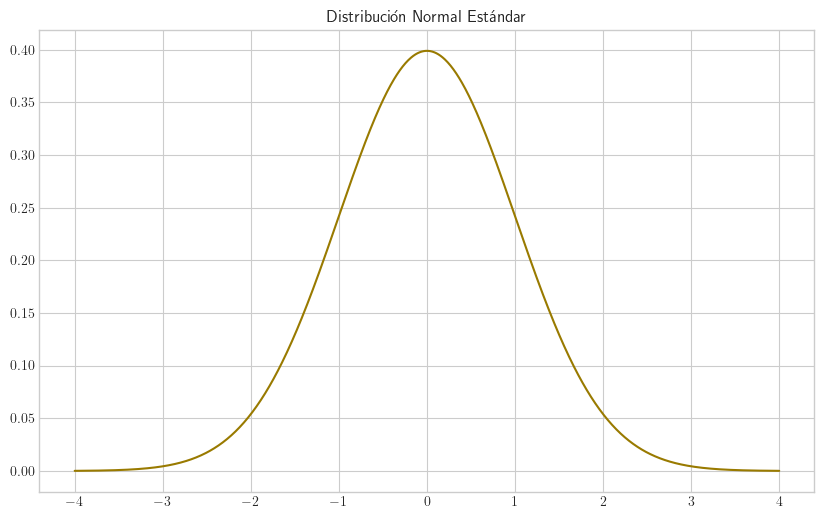

In [3]:
z = np.linspace(-4, 4, 1000)

p = [norm.pdf(i) for i in z]

fig, ax = plt.subplots()

ax.plot(z, p, linestyle='-',color='#997a00')
plt.title('Distribución Normal Estándar')
plt.show()


Para generar valores congruentes con una normal estándar, podemos usar <i>scipy</i>

In [4]:
np.random.seed(seed=0)
norm.rvs(0, 1, size=10)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

O, también usando <i>NumPy</i>

In [5]:
np.random.seed(seed=0)
np.random.normal(0, 1, size=10)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

El código: <i>np.random.seed(seed=0)</i>, es solo para facilitar que el algoritmo generador de números <i>pseudo-aleatorios</i> produzca resultados reproducibles.

Generar 10 valores distribuidos según $\mathcal{N}(5, 2.5, size=10)$

In [6]:
np.random.normal(5, 2.5, 10)

array([5.36010893, 8.63568377, 6.90259431, 5.30418754, 6.10965808,
       5.83418582, 8.73519768, 4.48710434, 5.78266925, 2.86476065])

La normal estándar acumulada, tiene la forma:

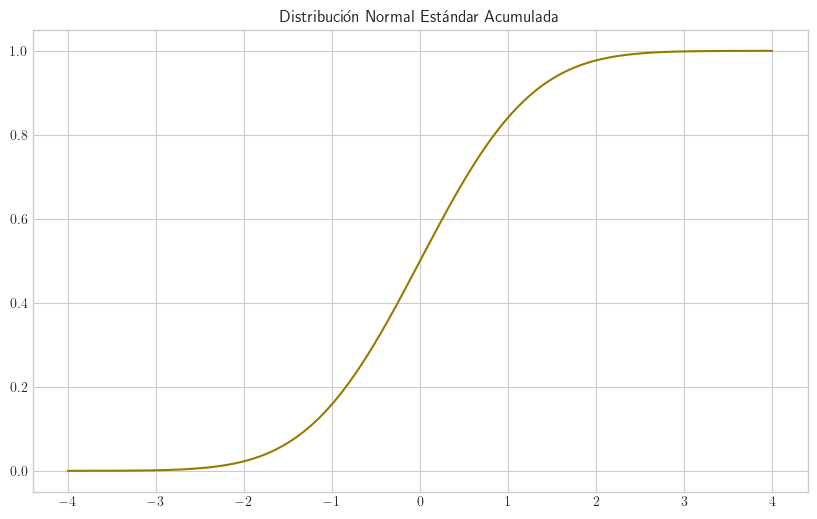

In [7]:
z = np.linspace(-4, 4, 1000)

p = [norm.cdf(i) for i in z]

fig, ax = plt.subplots()

ax.plot(z, p, linestyle='-',color='#997a00')
plt.title('Distribución Normal Estándar Acumulada')
plt.show()

### Cálculo de Probabilidades

Una forma de emular la función de densidad de una normal, en Python, sería:

In [8]:
def PDF(x, m, s):
    prob = (1/np.sqrt(2 * np.pi)*s)
    prob *= np.exp(-0.5 * x**2)
    return (1/np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x-m)/s)**2)

Para hallar los valores de la función de densidad normal, sobre un conjunto de valores como los siguientes:

In [9]:
perc = [-1.96, -1.64, 1.28, 0, 1.28, 1.64, 1.96]

In [10]:
list(map(lambda x: PDF(x, 0, 1), perc))

[0.05844094433345147,
 0.10396109532876423,
 0.17584743029766237,
 0.3989422804014327,
 0.17584743029766237,
 0.10396109532876423,
 0.05844094433345147]

  Si la variable se distribuye con media 10 y desviación estándar 2.5: $X \sim \mathcal{N}(10, 2.5)$, por ejemplo

In [11]:
li = [3, 5, 7, 11, 13, 15]

Entonces las probabilidades asociadas a los valores contenidos en esa lista son:

In [12]:
list(map(lambda x: PDF(x, 10, 2.5), li))

[0.007915451582979969,
 0.05399096651318806,
 0.19418605498321295,
 0.36827014030332333,
 0.19418605498321295,
 0.05399096651318806]

Para calcular, por ejemplo, $P(Z \leq -1.96)$; siendo $Z \sim \mathcal{N}(0,1)$. El problema puede abordarse utilizando integración: $\int_{0}^{1.337} \mathcal{f}(x)\, dx$, además en ese caso se trataría de una función de densidad acumulada o un área bajo la curva.

In [13]:
from scipy import integrate

In [14]:
integrate.quad(lambda x: PDF(x, 0, 1), -np.inf, -1.96)[0]

0.024997895148216577

Ahora usando la acumulada, de <i>scipy.stats.norm</i>:

In [15]:
norm.cdf(-1.96)

0.024997895148220435

Coinciden perfectamente para los primeros 13 decimales, en este caso; la discrepancia debe estar relacionada con el error que reporta la función para integrar.

In [16]:
integrate.quad(lambda x: PDF(x, 0, 1), -np.inf, -1.96)[1]

5.885500588443678e-09

In [17]:
ex = (r"$PDF(-1.96, 0, 1) \approx 0.058$")

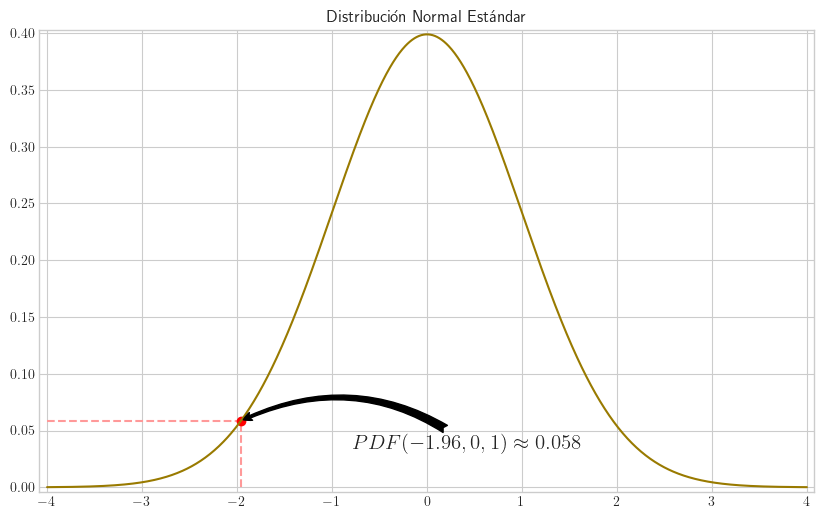

In [18]:
z = np.linspace(-4, 4, 1000)

p = [norm.pdf(i) for i in z]

fig, ax = plt.subplots()

ax.vlines(-1.96, 0, 0.05844, linestyle='--', color='#ff9999')
ax.hlines(0.05844, -4, -1.96, linestyle='--', color='#ff9999')
ax.plot(-1.96, 0.05844, marker='o', color='#ff0000')
ax.margins(x=0.01)
ax.margins(y=0.01)
ax.plot(z, p, linestyle='-',color='#997a00')
ax.annotate(ex, (-1.96, 0.05844), xytext=(80, -20),
           textcoords='offset points',
           fontsize=15,
           arrowprops=dict(
            arrowstyle='fancy',
            color='#000000',
            connectionstyle='arc3, rad=0.3'
            ))
plt.title('Distribución Normal Estándar')
plt.show()

Es decir que, cuando decimos <i>función de densidad de probabilidad o PDF</i>, hablamos de un valor que la función asume sobre la curva. 

Mientras la <i>función de densidad acumulada</i> sería el área bajo la curva, cuando es evaluada en un intervalo, que es la más usual.

In [19]:
cdf = norm.cdf(-1.96, 0, 1)
cdf

0.024997895148220435

In [20]:
ex = (r"$CDF(-1.96, 0, 1) \approx 0.025$")

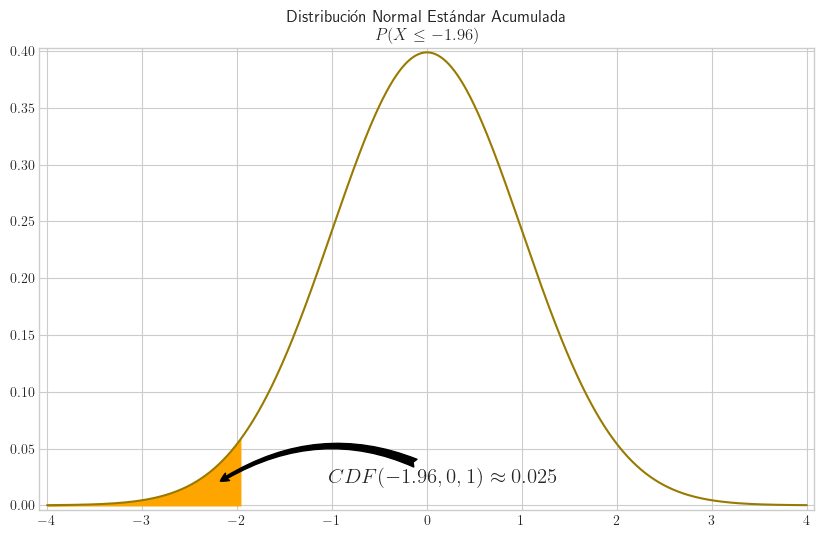

In [21]:
z = np.linspace(-4, 4, 1000)

p = [norm.pdf(i) for i in z]

fig, ax = plt.subplots()

ax.margins(x=0.01)
ax.margins(y=0.01)
ax.plot(z, p, linestyle='-',color='#997a00')
ax.fill_between(z, p, where = (z <= -1.96),
               color = 'orange')
ax.annotate(ex, (-2.2, 0.02), xytext=(80, 0),
           textcoords='offset points',
           fontsize=15,
           arrowprops=dict(
            arrowstyle='fancy',
            color='#000000',
            connectionstyle='arc3, rad=0.3'
            ))
plt.title('Distribución Normal Estándar Acumulada\n$P(X \leq -1.96)$')
plt.show()

Otro ejemplo, hallar la probabilidad:

$$P(-1.96 \leq Z \geq 1.96) = 1 - 2 \cdot P(Z \leq -1.96)$$

Se traduce usando <i>scipy</i>, en:

In [22]:
1 - 2 * norm.cdf(-1.96)

0.9500042097035591

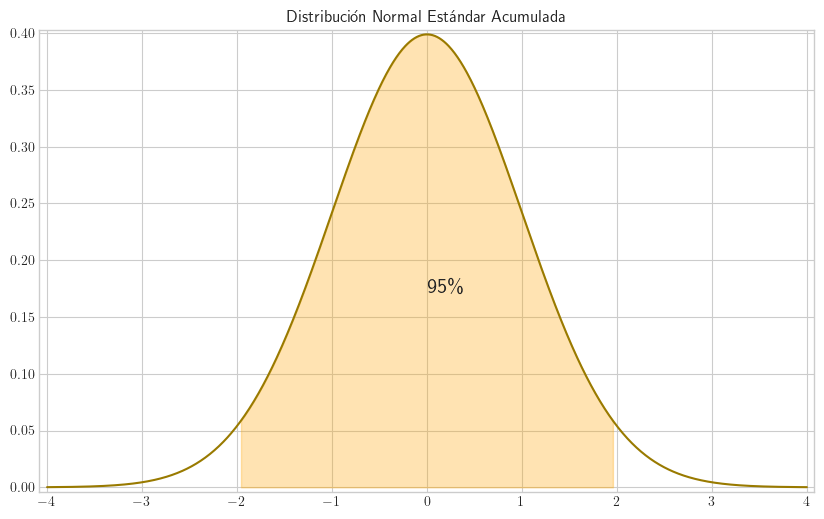

In [23]:
z = np.linspace(-4, 4, 1000)

p = [norm.pdf(i) for i in z]

x_0 = z[z > -1.96]
x_0 = x_0[x_0 < 1.96]

y_0 = [norm.pdf(i) for i in x_0]

fig, ax = plt.subplots()

ax.margins(x=0.01)
ax.margins(y=0.01)
ax.plot(z, p, linestyle='-',color='#997a00')
ax.fill_between(x_0, y_0, #, where = (z >= -1.96 | z <= 1.96),
               color = 'orange', alpha=0.3)
#ax.fill_between(z, p, where = (z <= 1.96),
#               color = 'orange', alpha=0.3)
ax.annotate("95\%", (0, 0.17), xytext=(0, 0),
           textcoords='offset points',
           fontsize=15)
plt.title('Distribución Normal Estándar Acumulada')
plt.show()